In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
path='D:/Github/AIClass/datasource_lecutre/datasource/export_sql_1558435/'

In [4]:
news = pd.read_csv(path+'sqlResult_1558435.csv',encoding='utf-8')

In [6]:
news.shape[0]

89611

In [7]:
import re
is_xinhuaAgency = [1 if len(re.findall(r'新华社', str(news.iloc[x]['source']))) > 0 else 0 for x in range(news.shape[0])]
news['label'] = is_xinhuaAgency
news.head()

,id,author,source,content,feature,title,url,label
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm,0
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm,0
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm,0
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....,1
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...,0


In [8]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import jieba
news_tagged = [TaggedDocument(jieba.lcut(str(news.iloc[x]['content']), cut_all=False),[news.iloc[x]['id']])\
                 for x in range(news.shape[0])]

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\sdm\AppData\Local\Temp\jieba.cache
Loading model cost 0.900 seconds.
Prefix dict has been built succesfully.


In [9]:
news_tagged[:3]

[TaggedDocument(words=['此外', '，', '自', '本周', '（', '6', '月', '12', '日', '）', '起', '，', '除', '小米', '手机', '6', '等', '15', '款', '机型', '外', '，', '其余', '机型', '已', '暂停', '更新', '发布', '（', '含', '开发', '版', '/', '体验版', '内测', '，', '稳定版', '暂不受', '影响', '）', '，', '以', '确保', '工程师', '可以', '集中', '全部', '精力', '进行', '系统优化', '工作', '。', '有人', '猜测', '这', '也', '是', '将', '精力', '主要', '用到', 'MIUI', ' ', '9', '的', '研发', '之中', '。', '\r\n', 'MIUI', ' ', '8', '去年', '5', '月', '发布', '，', '距今已有', '一年', '有余', '，', '也', '是', '时候', '更新换代', '了', '。', '\r\n', '当然', '，', '关于', 'MIUI', ' ', '9', '的', '确切', '信息', '，', '我们', '还是', '等待', '官方消息', '。', '\r\n'], tags=[89617]),
 TaggedDocument(words=['骁龙', '835', '作为', '唯一', '通过', 'Windows', ' ', '10', '桌面', '平台', '认证', '的', 'ARM', '处理器', '，', '高通', '强调', '，', '不会', '因为', '只', '考虑', '性能', '而', '去', '屏蔽掉', '小', '核心', '。', '相反', '，', '他们', '正', '联手', '微软', '，', '找到', '一种', '适合', '桌面', '平台', '的', '、', '兼顾', '性能', '和', '功耗', '的', '完美', '方案', '。', '\r\n', '报道', '称', '，', '微软', '已经', '拿到',

In [11]:
import multiprocessing
model = Doc2Vec(news_tagged, vector_size=100, workers = multiprocessing.cpu_count())

In [13]:
print(model.docvecs[news.iloc[1]['id']])
print(news.iloc[1]['content'])

[ 0.12045509 -0.2772601  -0.02690748  0.3001812  -0.22085443  0.09142381
 -0.35839924 -0.0585203   0.25550357  0.01683759  0.15159789  0.00492576
 -0.02375304 -0.0049313   0.13672562  0.03363952  0.12542392  0.20380668
  0.07518575  0.26414058 -0.17280224 -0.29611474  0.11103313  0.04877952
 -0.00694645 -0.23391905 -0.07550139 -0.01376942 -0.15265378 -0.06156757
  0.07293627 -0.31448394  0.00871409  0.01963553  0.08589853 -0.08867522
  0.18562514 -0.02125612 -0.27557373  0.07755356  0.27985522  0.07729336
  0.05983615 -0.41029406  0.20965116  0.20096366  0.09758635  0.00663406
 -0.04657421 -0.23908183  0.05440111 -0.17568368  0.14200222 -0.1511369
 -0.18712482  0.02273025  0.13530168  0.02743545 -0.14802015 -0.00996444
  0.08740143 -0.1388291   0.21584629  0.09422719  0.10214749 -0.05724267
 -0.01557247 -0.12712513 -0.15117322  0.11991658 -0.11473115  0.2217389
  0.2725951   0.08959322  0.27310938  0.07304131  0.04393626  0.02964813
  0.0419438  -0.2588414   0.03462519  0.12536983  0.0

In [15]:
# add sentence vector to corresponding row
def add_sentence_vector_to_csv(csv, Model):
    sentence_vector = [Model.docvecs[csv.iloc[x]['id']] for x in range(csv.shape[0])]
    csv_vector = csv
    csv_vector['vector'] = sentence_vector   
    return csv_vector

news_vector = add_sentence_vector_to_csv(news, model)

In [17]:
train_data, test_data = train_test_split(news_vector, test_size=0.2, random_state=1000)
print(train_data.shape)
print(test_data.shape)
train_X, train_Y = train_data['vector'], train_data['label']
test_X, test_Y = test_data['vector'], test_data['label']

# change dataset structure
train_X = [train_X.iloc[x] for x in range(train_X.shape[0])]
train_Y = [train_Y.iloc[x] for x in range(train_Y.shape[0])]

test_X = [test_X.iloc[x] for x in range(test_X.shape[0])]
test_Y = [test_Y.iloc[x] for x in range(test_Y.shape[0])]

(71688, 9)
(17923, 9)


Using XGBoost

In [26]:
## XGBoost
import numpy as np
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(np.array(train_X), np.array(train_Y))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
# PR-curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [28]:
y_pred_XGB = XGB.predict(np.array(test_X))
y_pred_XGB_prob = XGB.predict_proba(np.array(test_X))

In [31]:
accuracy_XGB = sum([1 if test_Y[x] == y_pred_XGB[x] else 0 for x in range(len(test_Y))]) / len(test_Y)
accuracy_XGB

0.9208279863862077

AUPR =  0.9875081779949257
F1 Score =  0.9565510272819131


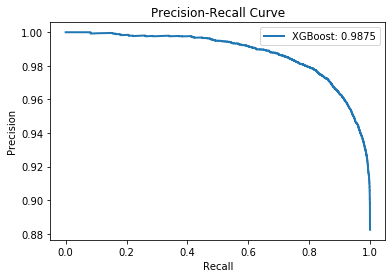

In [37]:
precision_XGB, recall_XGB, _ = precision_recall_curve(test_Y, y_pred_XGB_prob[:,1])
AUPR_XGB = auc(recall_XGB, precision_XGB)
print('AUPR = ', AUPR_XGB)
F1_score_XGB = f1_score(test_Y, y_pred_XGB)
print('F1 Score = ', F1_score_XGB)
plt.plot(recall_XGB, precision_XGB, lw=2, label='XGBoost: ' + str(np.round(AUPR_XGB, 4)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')
plt.show()

Using lightgbm

In [39]:
import lightgbm as lgb
lgb_params = {
    'learning_rate':0.1,
    'max_bin':150,
    'num_leaves':32,    
    'max_depth':11,  
    'objective':'regression',
    'n_estimators':300
}
model_lightgbm=lgb.LGBMClassifier(**lgb_params)

model_lightgbm.fit(np.array(train_X), np.array(train_Y))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_bin=150,
               max_depth=11, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=300, n_jobs=-1, num_leaves=32,
               objective='regression', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [40]:
y_pred_lightgbm = model_lightgbm.predict(np.array(test_X))
y_pred_lightgbm_prob = model_lightgbm.predict_proba(np.array(test_X))

In [41]:
accuracy_lightgbm = sum([1 if test_Y[x] == y_pred_lightgbm[x] else 0 for x in range(len(test_Y))]) / len(test_Y)
accuracy_lightgbm

0.9396306421915974

AUPR =  0.9923782425621155
F1 Score =  0.966547118476379


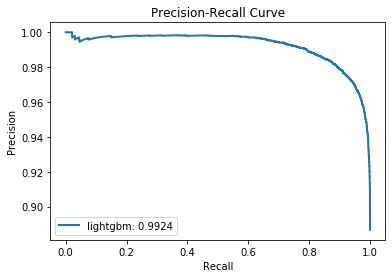

In [42]:
precision_lightgbm, recall_lightgbm, _ = precision_recall_curve(test_Y, y_pred_lightgbm_prob[:,1])
AUPR_lightgbm = auc(recall_lightgbm, precision_lightgbm)
print('AUPR = ', AUPR_lightgbm)
F1_score_lightgbm = f1_score(test_Y, y_pred_lightgbm)
print('F1 Score = ', F1_score_lightgbm)
plt.plot(recall_lightgbm, precision_lightgbm, lw=2, label='lightgbm: ' + str(np.round(AUPR_lightgbm, 4)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')
plt.show()

Using Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_X, train_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
y_pred_NB = gnb.predict(test_X)
y_pred_NB_prob = gnb.predict_proba(test_X)

In [47]:
accuracy_NB = sum([1 if test_Y[x] == y_pred_NB[x] else 0 for x in range(len(test_Y))]) / len(test_Y)
accuracy_NB

0.7917759303687999

AUPR =  0.9522651001863647
F1 Score =  0.8760956175298805


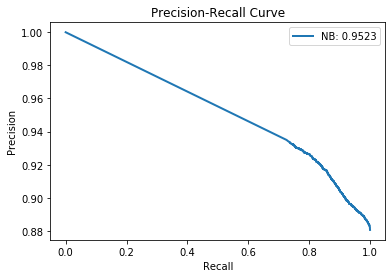

In [48]:
precision_NB, recall_NB, _ = precision_recall_curve(test_Y, y_pred_NB_prob[:,1])
AUPR_NB = auc(recall_NB, precision_NB)
print('AUPR = ', AUPR_NB)
F1_score_NB = f1_score(test_Y, y_pred_NB)
print('F1 Score = ', F1_score_NB)
plt.plot(recall_NB, precision_NB, lw=2, label='NB: ' + str(np.round(AUPR_NB, 4)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')
plt.show()

Using SVM

In [49]:
from sklearn.svm import SVC

# train
clf = SVC(probability=True)
clf.fit(train_X, train_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
y_pred = clf.predict(test_X)
y_pred_prob = clf.predict_proba(test_X)

In [51]:
accuracy = sum([1 if test_Y[x] == y_pred[x] else 0 for x in range(len(test_Y))]) / len(test_Y)
accuracy

0.8894158344027228

AUPR =  0.9729898785575574
F1 Score =  0.9408534765741569


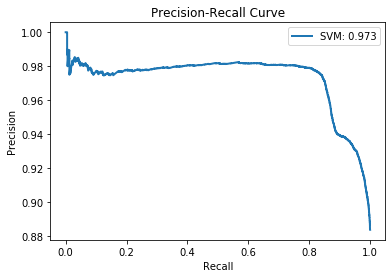

In [52]:
precision, recall, _ = precision_recall_curve(test_Y, y_pred_prob[:,1])
AUPR = auc(recall, precision)
print('AUPR = ', AUPR)
F1_score = f1_score(test_Y, y_pred)
print('F1 Score = ', F1_score)
plt.plot(recall, precision, lw=2, label='SVM: ' + str(np.round(AUPR, 4)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')
plt.show()

In [67]:
import sklearn.ensemble as se  # 集合算法模块
model_RandomForest = se.RandomForestClassifier(max_depth=5, n_estimators=1000, min_samples_split=3)
model_RandomForest.fit(train_X, train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
y_pred_RandomForest = model_RandomForest.predict(test_X)
y_pred_RandomForest_prob = model_RandomForest.predict_proba(test_X)

In [72]:
accuracy_RandomForest = sum([1 if test_Y[x] == y_pred_RandomForest[x] else 0 for x in range(len(test_Y))]) / len(test_Y)
accuracy_RandomForest

0.9062098978965575

AUPR =  0.9832660694297122
F1 Score =  0.9493201483312731


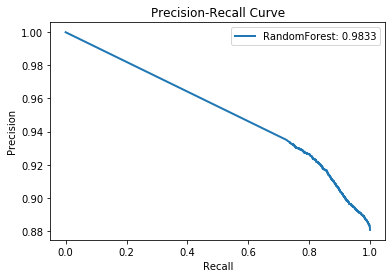

In [73]:
precision_RandomForest, recall_RandomForest, _ = precision_recall_curve(test_Y, y_pred_RandomForest_prob[:,1])
AUPR_RandomForest = auc(recall_RandomForest, precision_RandomForest)
print('AUPR = ', AUPR_RandomForest)
F1_score_RandomForest = f1_score(test_Y, y_pred_RandomForest)
print('F1 Score = ', F1_score_RandomForest)
plt.plot(recall_NB, precision_NB, lw=2, label='RandomForest: ' + str(np.round(AUPR_RandomForest, 4)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')
plt.show()

总结

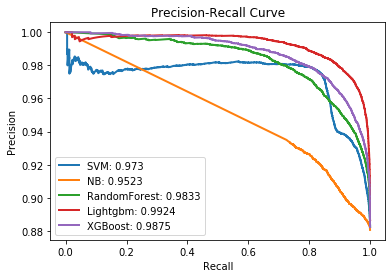

In [75]:
# SVM
plt.plot(recall, precision, lw=2, label='SVM: ' + str(np.round(AUPR, 4)))

# Naive Bayes
plt.plot(recall_NB, precision_NB, lw=2, label='NB: ' + str(np.round(AUPR_NB, 4)))

# RandomForest
plt.plot(recall_RandomForest, precision_RandomForest, lw=2, label='RandomForest: ' + str(np.round(AUPR_RandomForest, 4)))

# Lightgbm
plt.plot(recall_lightgbm, precision_lightgbm, lw=2, label='Lightgbm: ' + str(np.round(AUPR_lightgbm, 4)))

# XGBoost
plt.plot(recall_XGB, precision_XGB, lw=2, label='XGBoost: ' + str(np.round(AUPR_XGB, 4)))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')

plt.show()

Text(0.5, 1.0, 'Accuracy')

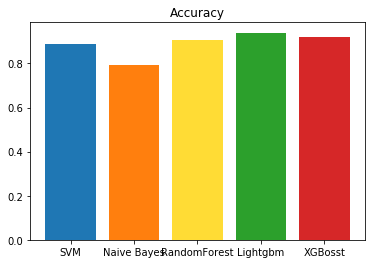

In [76]:
## Accuracy
%matplotlib inline
plt.bar(['SVM','Naive Bayes','RandomForest','Lightgbm','XGBosst'],[accuracy, accuracy_NB,accuracy_RandomForest, accuracy_lightgbm, accuracy_XGB],color=[u'#1f77b4', u'#ff7f0e',u'#ffdc35', u'#2ca02c', u'#d62728'])
plt.title('Accuracy')

Text(0.5, 1.0, 'F1 Score')

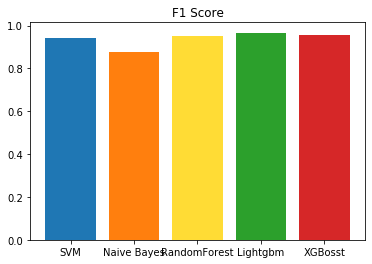

In [77]:

## F1 score
plt.bar(['SVM','Naive Bayes','RandomForest','Lightgbm','XGBosst'],[F1_score, F1_score_NB,F1_score_RandomForest, F1_score_lightgbm, F1_score_XGB],color=[u'#1f77b4', u'#ff7f0e',u'#ffdc35', u'#2ca02c', u'#d62728'])
plt.title('F1 Score')

结论

通过AUPR、Accuracy、F1 score三个指标对比，Lightgbm效果最好，XGBosst次之，Naive Bayes最差。SVM方法训练速度特别慢，在数据量大、特征多的情况下，SVM方法需要慎重使用。